In [ ]:
from pathlib import Path
from io import BytesIO
from fastai.vision import *

In [ ]:
path=Path('/Users/wooduk/Downloads')
learn = load_learner(path,'export.pkl')

Adjust the test set images to reduce size (they were taken with phone).

In [ ]:
from PIL import Image
from tqdm import tqdm

orig_test_set_path = Path('/Users/wooduk/projects/pokemon/card_images/test_orig')
test_set_path = Path('/Users/wooduk/projects/pokemon/card_images/test')
Path.mkdir(test_set_path, exist_ok=True)
test_set_images = list(os.walk(orig_test_set_path))[0][2]

size=(251,251)
for filename in tqdm(test_set_images):
    if filename.split('.')[-1].lower() != 'jpg':
        continue
    im = Image.open(orig_test_set_path/filename)
    im = im.rotate(-90, expand=True)
    im.thumbnail(size, Image.ANTIALIAS)
    im.save(test_set_path/filename, "JPEG")
    

100%|██████████| 22/22 [00:11<00:00,  1.87it/s]


Just manually go through these examples and plot out each image with predicted class

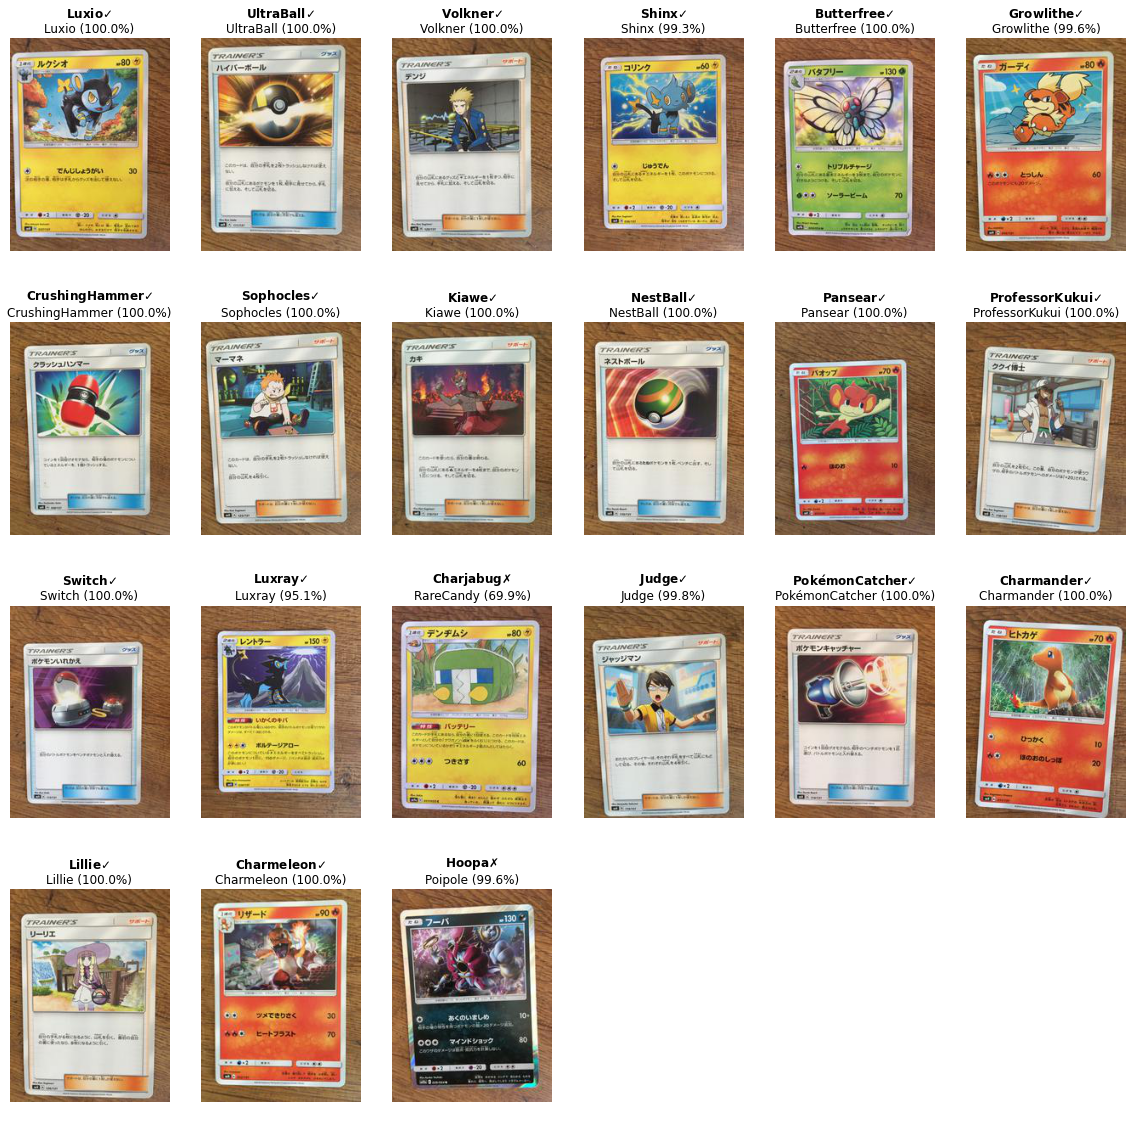

In [ ]:
test_set_path = Path('/Users/wooduk/projects/pokemon/card_images/test')
test_set_images = list(os.walk(test_set_path))[0][2]

fig,ax = plt.subplots(4,6,figsize=(20,20))
ax=ax.flatten()
[a.axis('off') for a in ax]

import unicodedata
def normalise(text):
    return unicodedata.normalize('NFD',text)

i=0
for filename in test_set_images:
    if filename.split('.')[-1].lower() != 'jpg':
        continue
    char_name=filename.split('.')[0]
    img = open_image(test_set_path/filename)
    predicted_class, pred_class_i, class_probs = learn.predict(img)
    class_probs = list(class_probs.numpy())
    top3 = sorted(class_probs,reverse=True)[:3]
    top3_probs = {learn.data.classes[class_probs.index(p)]:p for p in top3}
    img.show(ax=ax[i])
    
    if normalise(char_name)==normalise(str(predicted_class)):
        res = '\u2713'
    else:
        res= u'\u2717'
    ax[i].set_title(f"$\mathbf{{ {char_name}}}${res}\n{predicted_class} ({100.0*top3_probs[str(predicted_class)]:.1f}%)")
    i+=1
   
    

So where it is correct, its pretty sure of it's prediction.

The 2 cases where we didn't predict correctly (Hoopla and Charjabug). Well these images weren't actually in the training set...

In [ ]:
import pickle
with open('../tmp/cards.pkl','rb') as f:
    cards = pickle.load(f)

In [ ]:
[cards.get(c,f'{c} not found') for c in ['Hoopla', 'Charjabug']]

['Hoopla not found', 'Charjabug not found']

Ooops!

Serve up some Goulash!

In [ ]:
predicted_card = cards[str(predicted_class)]
print(predicted_card['name'], predicted_card['card_text'])

Poipole [{'type': 'info', 'description': 'Ultra Beast'}, {'type': 'info', 'description': 'Ultra Beast'}, {'type': 'move', 'description': None, 'energy_items': ['Colorless'], 'name': {'jp': 'とばす', 'en': 'Belt'}, 'points': 10}, {'type': 'move', 'description': 'If each player has exactly 1 Prize card remaining, this attack does 130 more damage.', 'energy_items': ['Psychic', 'Colorless', 'Colorless'], 'name': {'jp': '50+', 'en': 'Last Scene ラストシーン'}, 'points': None}]


In [ ]:
class display_card(card):
    def __init__(self):
            self.card = card
    
    def html(self):
        